In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv("Infrared.csv")
df.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


In [20]:
categorical_cols = ['Gender', 'Age', 'Ethnicity']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['aveOralM']]

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputasi numerik
            ('scaler', StandardScaler())                  # Scaling
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi kategorikal
            ('encoder', OneHotEncoder())                          # Encoding
        ]), categorical_cols)
    ])

In [22]:
# Pisahkan data sebelum preprocessing
X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformasi data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [24]:
# Model K-NN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_processed, y_train)
y_pred_knn = knn.predict(X_test_processed)

# Model Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train_processed, y_train)
y_pred_dt = dt.predict(X_test_processed)

# Fungsi evaluasi
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'R²': r2}

print("K-NN:", evaluate_model(y_test, y_pred_knn))
print("Decision Tree:", evaluate_model(y_test, y_pred_dt))

K-NN: {'MSE': 0.06476176470588267, 'RMSE': 0.254483328935085, 'R²': 0.6924485545755686}
Decision Tree: {'MSE': 0.0795444084182429, 'RMSE': 0.2820361828174585, 'R²': 0.6222462760926015}


1. **Matriks Evaluasi (RMSE, MSE, R²)**
    Berikut rumus dan penjelasannya:

    a. MSE (Mean Squared Error)
    
    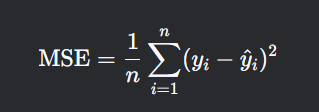

    - Penjelasan: Rata-rata kuadrat selisih antara nilai aktual (yi) dan prediksi (^yi)
    - Kegunaan: Memberikan penalti lebih besar pada error yang besar.

    b. RMSE (Root Mean Squared Error) 

    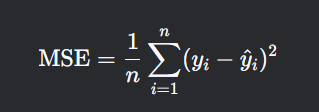

    - Penjelasan: Akar kuadrat dari MSE. Menunjukkan error dalam skala yang sama dengan variabel target.

    c. R-squared (Koefisien Determinasi)

    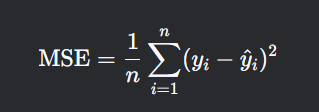   

    - Penjelasan: Mengukur seberapa baik model menjelaskan variasi data. Nilai 1 berarti sempurna, 0 berarti tidak lebih baik dari rata-rata.

 

